In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
# import plotly_express as px
pd.set_option('display.max_columns', None)

# Data Exploration

In [2]:
# ! pip install cufflinks
# ! pip install plotly_express


In [3]:
df = pd.read_csv("final_internship_data.csv")
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [5]:
df.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [6]:
# Remove user ID, user driver, Driver name, key, and pickup datetime

df = df.drop(['User ID', 'User Name', 'Driver Name','key','pickup_datetime'], axis=1)

In [7]:
# Display the value counts for each categorical column in the DataFrame
for col in df.select_dtypes("object").columns:
    print(df[col].value_counts(), "\n\n********************************")

Car Condition
Very Good    125312
Bad          124978
Good         124968
Excellent    124742
Name: count, dtype: int64 

********************************
Weather
sunny     100433
cloudy    100062
rainy      99972
stormy     99955
windy      99578
Name: count, dtype: int64 

********************************
Traffic Condition
Congested Traffic    166847
Dense Traffic        166584
Flow Traffic         166569
Name: count, dtype: int64 

********************************


In [8]:
df['year'].value_counts()

year
2012    80225
2011    79529
2013    78034
2009    77002
2010    75791
2014    74608
2015    34811
Name: count, dtype: int64

In [9]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,-1.265712,0.696740,-1.265755,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916617,0.206941,0.140909,0.205903,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


There are 0 distance and negative values for fare amount and passenger count

In [10]:
count=0
for val in df['fare_amount']:
    if val<=0:
        count=count+1
        # print(val)
print('-'*30)
print(count)


------------------------------
35


In [11]:
count2=0
for val2 in df['distance']:
    if val2<=0:
        count2 +=1
        # print(val2)
print('-'*50)
print(count2)

--------------------------------------------------
14250


In [12]:
count3=0
for val3 in df['passenger_count']:
    if val3<=0:
        count3 +=1
        # print(val3)
print('-'*50)
print(count3)

--------------------------------------------------
1796


## Data Cleaning

In [13]:
# Replace the cols of null values with means
df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean(), inplace=True)
df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean(), inplace=True)
df['jfk_dist'].fillna(df['jfk_dist'].mean(), inplace=True)
df['ewr_dist'].fillna(df['ewr_dist'].mean(), inplace=True)
df['lga_dist'].fillna(df['lga_dist'].mean(), inplace=True)
df['sol_dist'].fillna(df['sol_dist'].mean(), inplace=True)
df['nyc_dist'].fillna(df['nyc_dist'].mean(), inplace=True)
df['distance'].fillna(df['distance'].mean(), inplace=True)
df['bearing'].fillna(df['bearing'].mean(), inplace=True)

In [14]:
df.isnull().sum()

Car Condition        0
Weather              0
Traffic Condition    0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             0
ewr_dist             0
lga_dist             0
sol_dist             0
nyc_dist             0
distance             0
bearing              0
dtype: int64

In [15]:
# Remove the fare amount les than or equal zero
df = df[df.fare_amount > 0]

In [16]:
# Remove distance less than or equal zero
df = df[df.distance > 0]

In [17]:
# Remove distance less than or equal zero
df = df[df.passenger_count > 0]

In [18]:
df.columns

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [19]:
df.head()

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,Very Good,windy,Congested Traffic,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,Excellent,cloudy,Flow Traffic,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,Bad,stormy,Congested Traffic,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,Very Good,stormy,Flow Traffic,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,Bad,stormy,Congested Traffic,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [20]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000
mean,11.362586,-1.288902,0.709490,-1.288945,0.709422,1.690584,13.511987,15.681434,6.271497,3.042019,2011.745166,75.646031,69.514144,53.407693,52.752827,45.021375,19.817421,0.305731
std,9.790614,0.117817,0.106353,0.115927,0.089398,1.306663,6.509960,8.681670,3.438339,1.948688,1.866989,794.570443,796.300324,796.220667,796.428940,796.669496,369.998746,1.830139
min,0.010000,-52.119764,-54.389440,-59.049665,-44.676047,1.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.143207,0.000084,-3.141593
25%,6.000000,-1.291409,0.710985,-1.291396,0.710968,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.320911,32.124720,17.056919,14.815953,7.079275,1.281789,-0.896055
50%,8.500000,-1.291231,0.711280,-1.291205,0.711289,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.487519,34.675639,19.510130,18.212602,10.330182,2.183334,-0.124425
75%,12.500000,-1.290992,0.711526,-1.290938,0.711543,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.690631,38.063660,22.041925,22.149009,14.182057,3.977564,2.253950
max,495.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


## EDA

In [21]:
# ! pip install --upgrade nbformat

In [22]:
df.tail()

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
499995,Bad,rainy,Dense Traffic,7.0,-1.291173,0.711514,-1.290951,0.711371,1,18,7,5,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706
499996,Very Good,rainy,Flow Traffic,13.7,-1.291595,0.710670,-1.291708,0.710540,1,12,13,9,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931
499997,Bad,rainy,Flow Traffic,25.0,-1.291262,0.710796,-1.289737,0.710366,1,0,25,8,0,2014,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251
499998,Good,stormy,Congested Traffic,6.5,-1.291101,0.711335,-1.291023,0.711480,6,12,12,1,0,2015,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817
499999,Very Good,sunny,Flow Traffic,4.9,-1.291312,0.710736,-1.291243,0.710582,1,23,12,4,0,2010,38.822968,31.517592,23.087427,11.950577,3.873636,1.040272,-2.813690


In [23]:
# # Visualize the geospatial locations for the pickup places
# tPickup_fig = px.scatter_mapbox(df, lat='pickup_latitude', lon='pickup_longitude', hover_name='fare_amount', hover_data=['fare_amount'],
#     color='fare_amount',color_continuous_scale=px.colors.sequential.Agsunset, opacity=.05,
#     # center={'lat': 0.71, 'lon': -1.29}, 
#     zoom=11,
#     # height=500,width=1180,
#     mapbox_style="carto-positron", labels=None)
# tPickup_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}).update_coloraxes(showscale=False)
# tPickup_fig.show()

In [24]:
# tDropoff_fig = px.scatter_mapbox(df, lat='dropoff_latitude', lon='dropoff_longitude', hover_name='fare_amount', hover_data=['fare_amount'],
#     color='fare_amount',color_continuous_scale=px.colors.sequential.Rainbow_r, opacity=0.1,
#     # center={'lat': 40.75, 'lon': 286.051},
#     zoom=11,
#     height=500,width=1180,
#     mapbox_style="carto-positron", labels=None)
# tDropoff_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}).update_coloraxes(showscale=False)
# tDropoff_fig.show()



<function matplotlib.pyplot.show(close=None, block=None)>

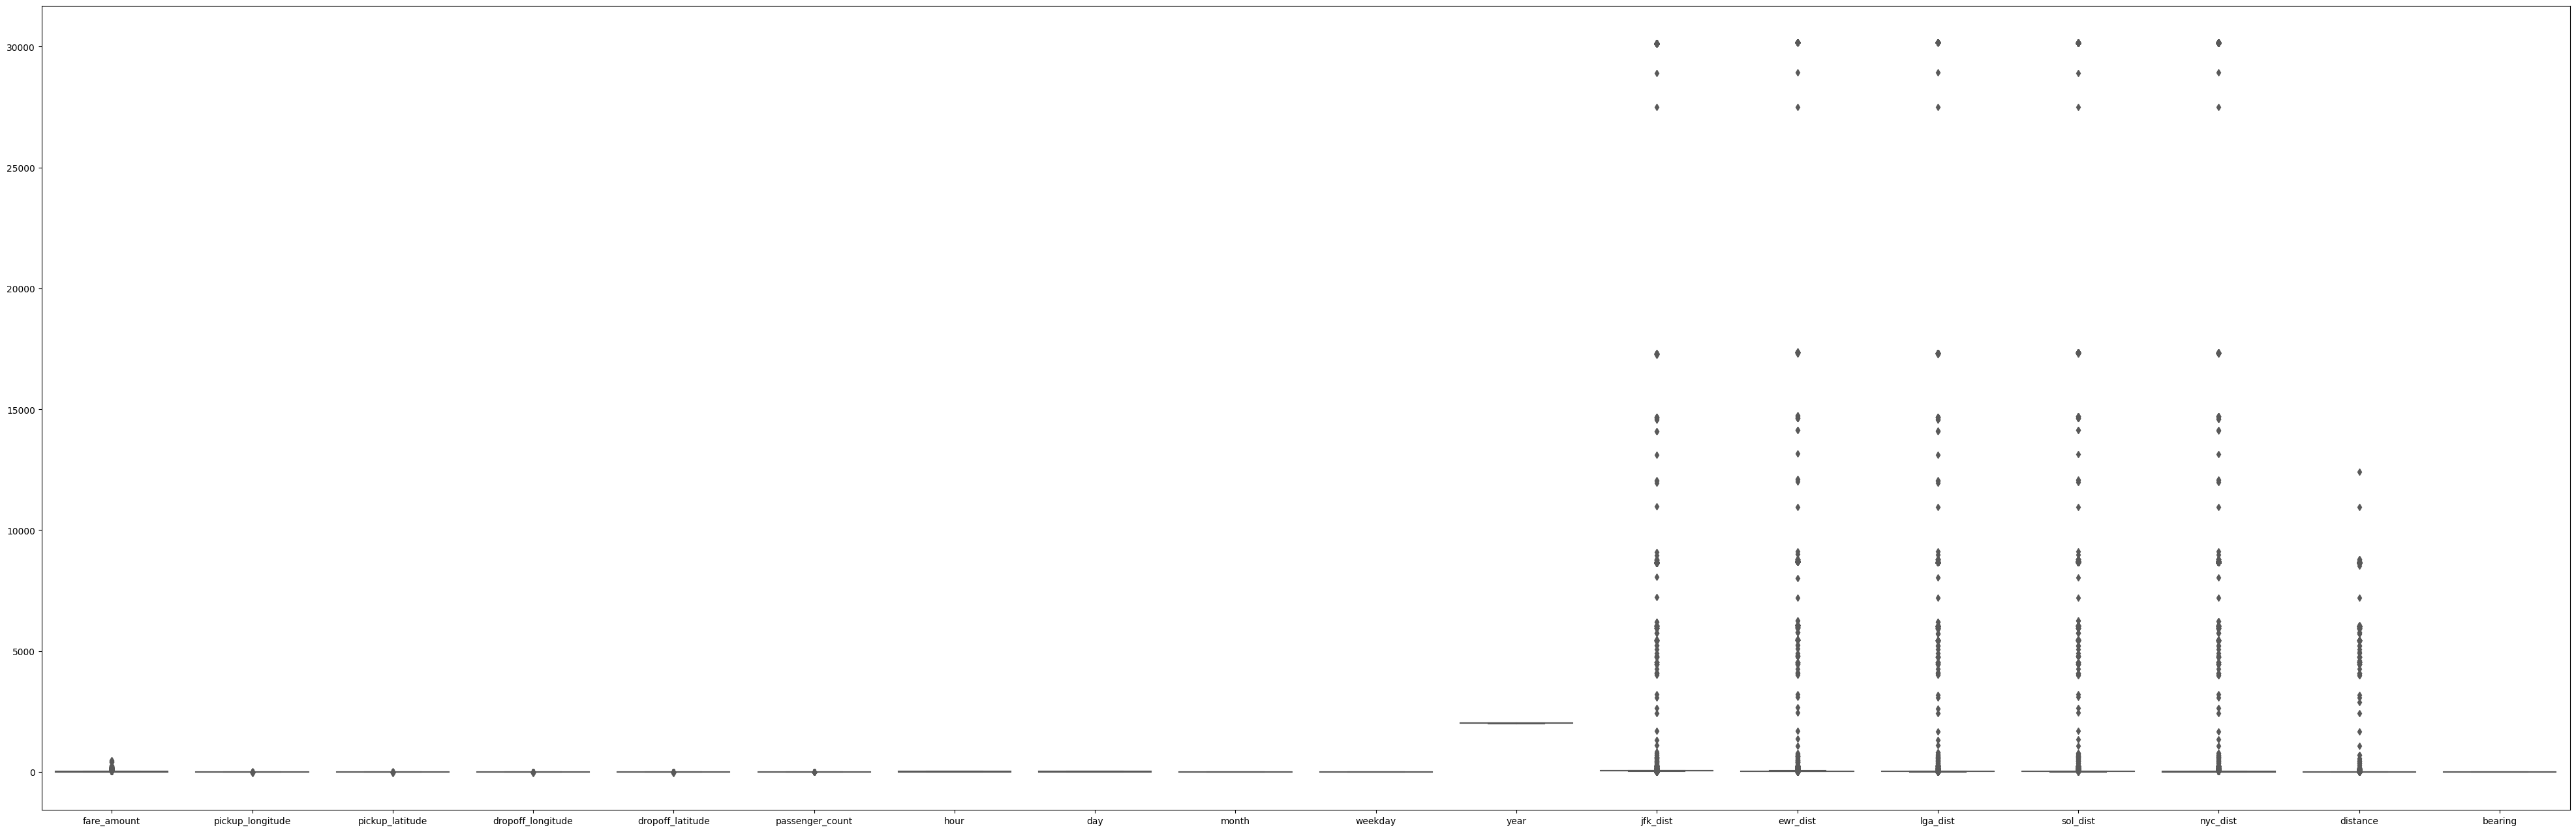

In [25]:
# Check and handling Outlier
fig, ax = plt.subplots(figsize=(50,16))
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show


In [26]:
# Remove Outlier
# df_copy = df
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    print("Q1 = ", Q1, " Q3 = ", Q3, " IQR = ", IQR)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Extract all column names as list in Pandas Dataframe
lst_all_cols = df.columns.tolist()
print("lst_all_cols : \n",lst_all_cols)

print("\n")
# Numerical data distribution
print(list(set(df.dtypes.tolist())))
df_num = df.select_dtypes(include = ["float64", "int64"])
lst_num_cols = df_num.columns.tolist()
print("Numerical Data : \n",lst_num_cols)
print("\n")


indx = 0
for col in lst_num_cols:
    print(indx)
    lower_range, upper_range =  remove_outlier(df[col])
    df[col] = np.where(df[col] < lower_range, lower_range, df[col])
    df[col] = np.where(df[col] > upper_range, upper_range, df[col])
    indx = indx +1
    print("-----------------------------")


lst_all_cols : 
 ['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month', 'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance', 'bearing']


[dtype('float64'), dtype('O'), dtype('int64')]
Numerical Data : 
 ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month', 'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance', 'bearing']


0
Q1 =  6.0  Q3 =  12.5  IQR =  6.5
-----------------------------
1
Q1 =  -1.2914085579916996  Q3 =  -1.290991598833398  IQR =  0.0004169591583016441
-----------------------------
2
Q1 =  0.7109853875135543  Q3 =  0.71152635231521  IQR =  0.0005409648016556634
-----------------------------
3
Q1 =  -1.291396288327058  Q3 =  -1.2909376359821338  IQR =  0.00045865234492414864
------

<function matplotlib.pyplot.show(close=None, block=None)>

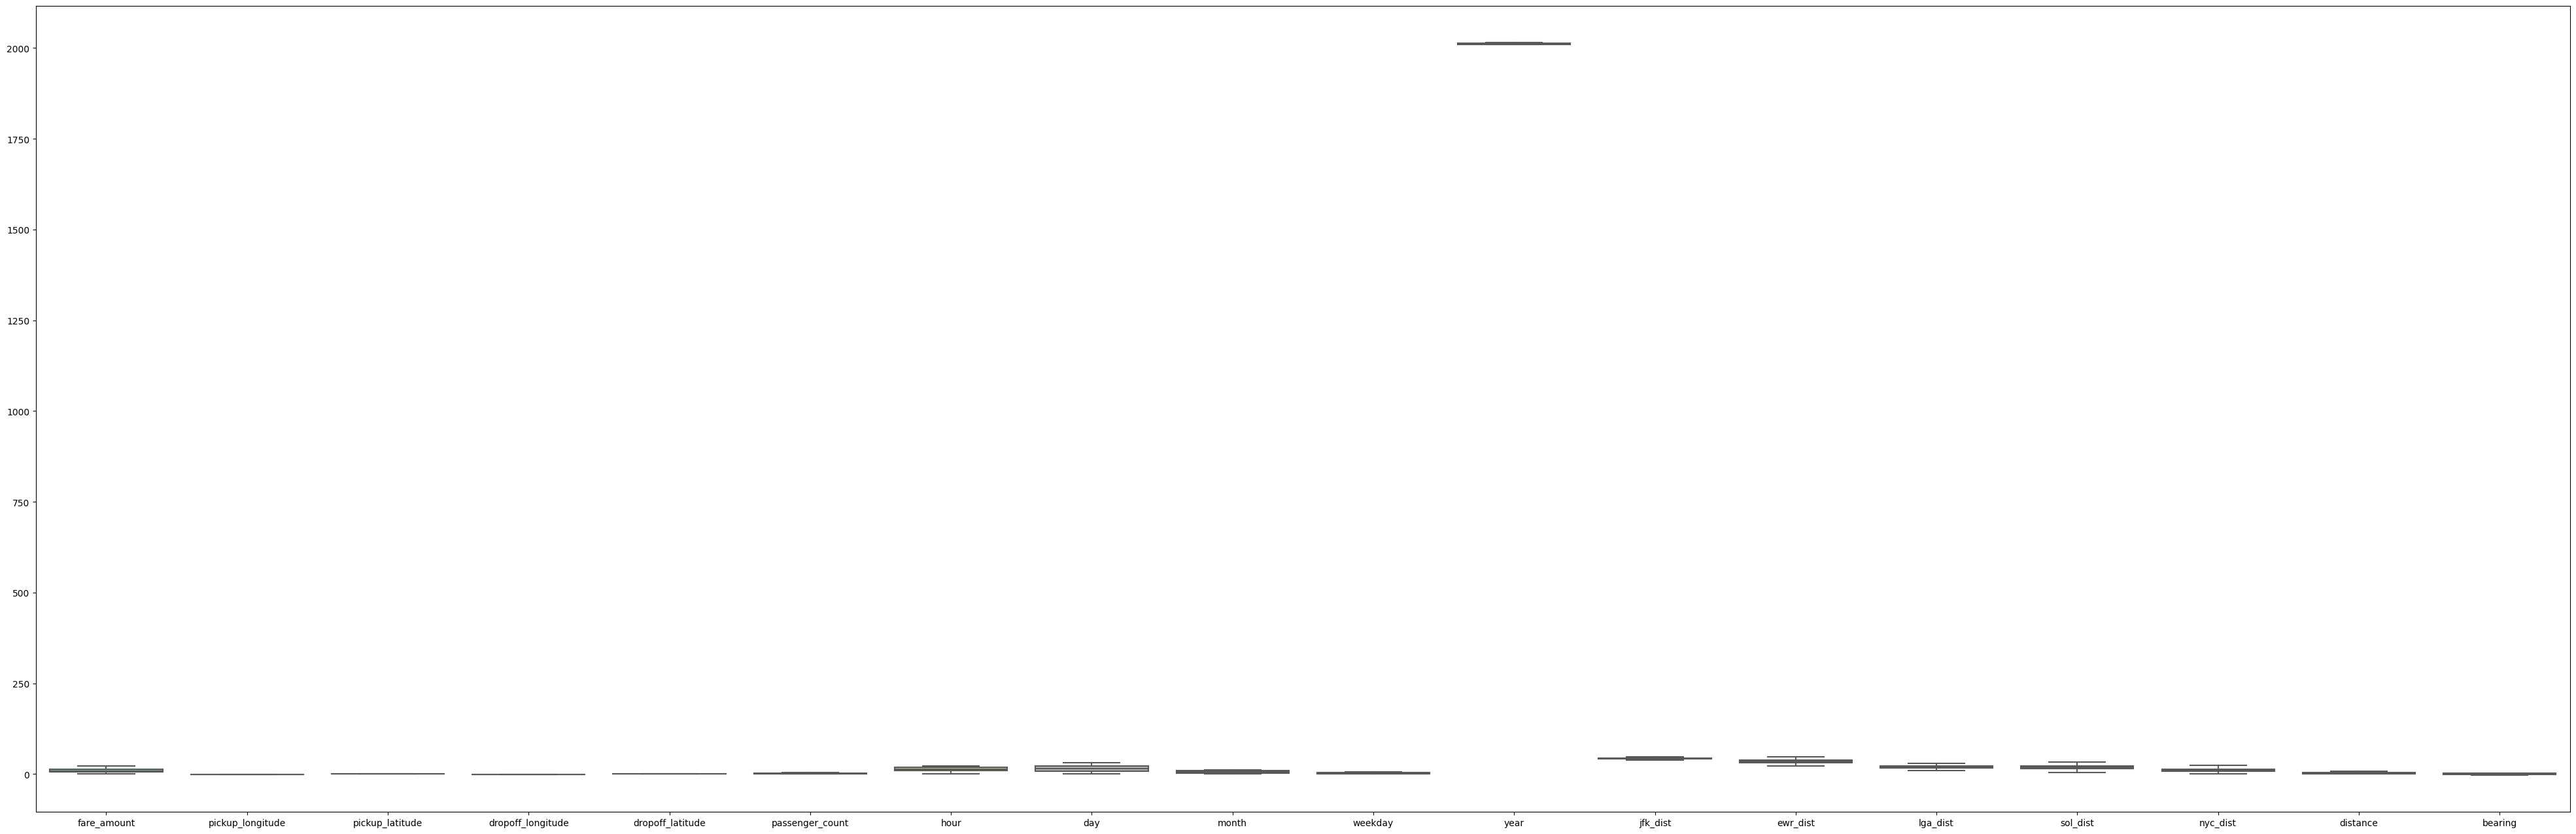

In [27]:
fig, ax = plt.subplots(figsize=(50,16))
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show

In [28]:
df.shape

(483950, 21)

In [29]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

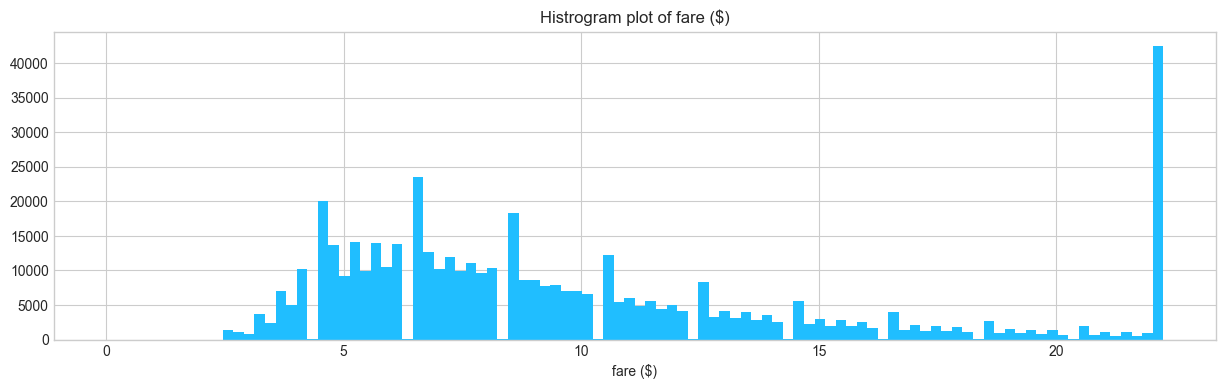

In [30]:
# Histogram plot for fare price
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15,4))
plt.hist(df['fare_amount'], bins=100, color='#20beff')
plt.xlabel("fare ($)")
plt.title("Histrogram plot of fare ($)")
plt.show()

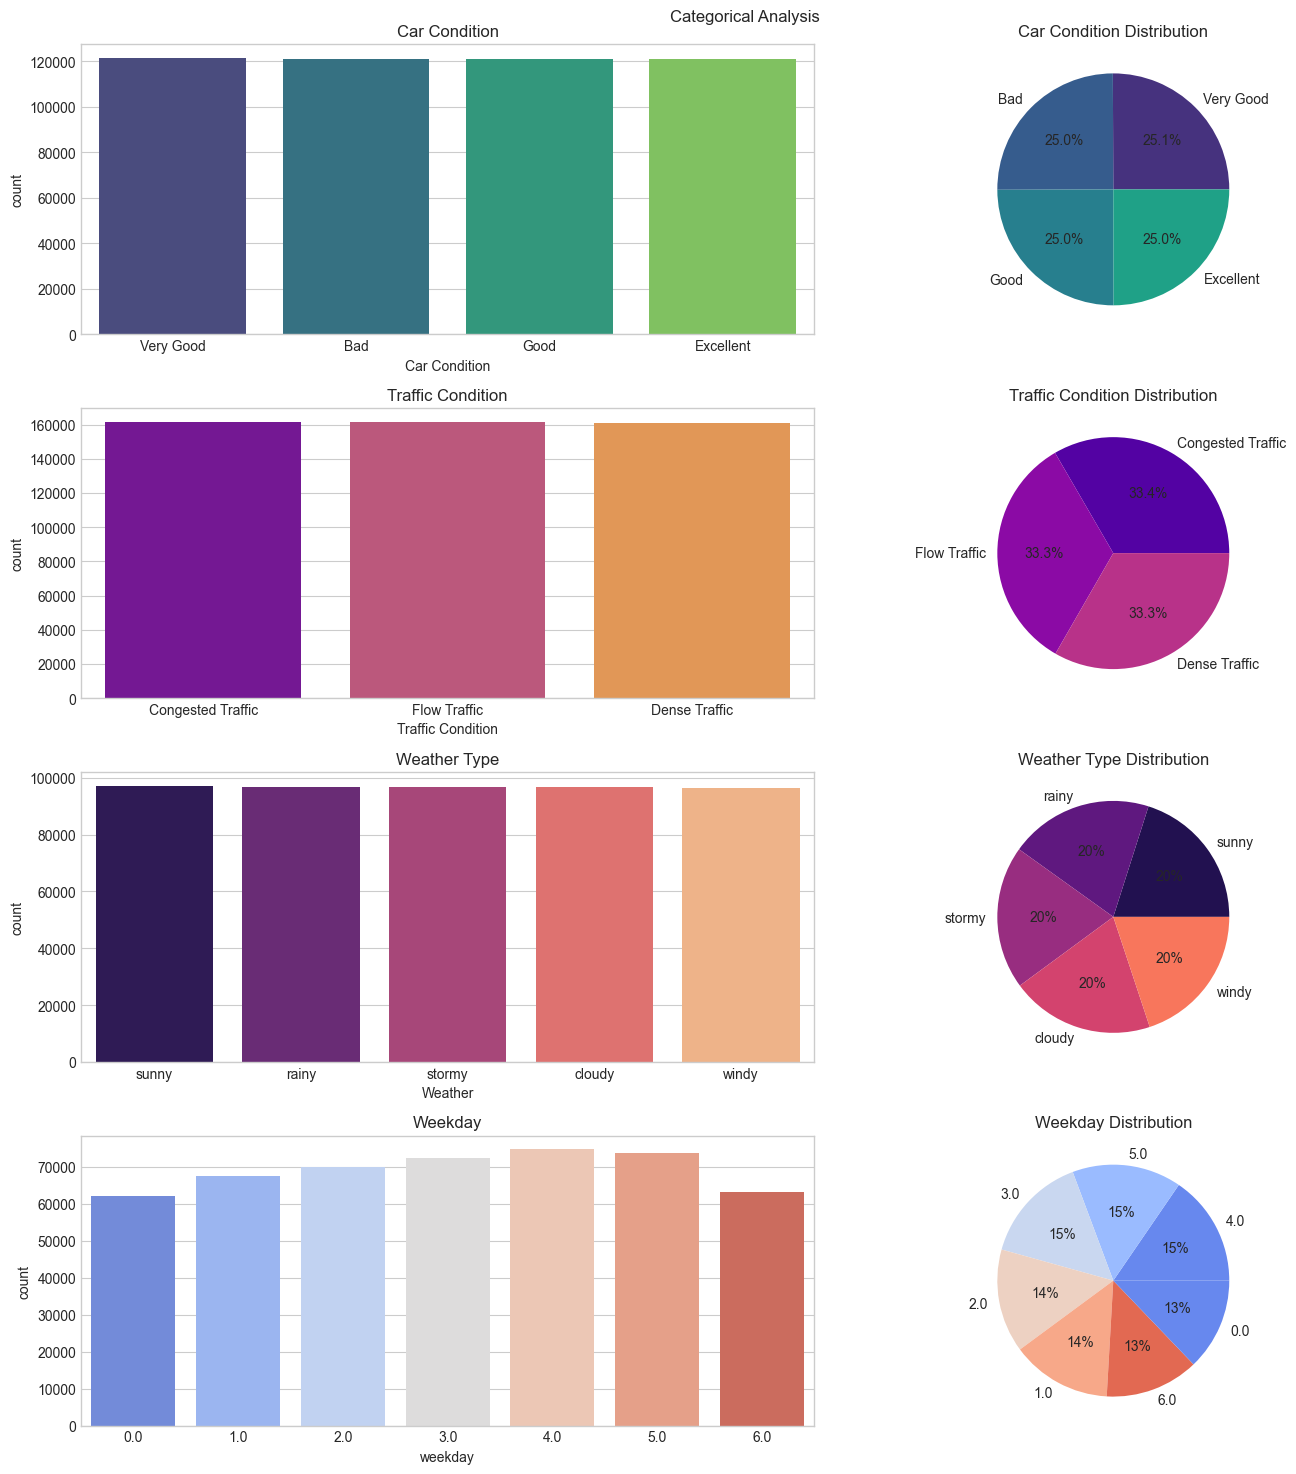

In [31]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))

# Car Condition
car_condition_counts = df['Car Condition'].value_counts()
sns.barplot(x=car_condition_counts.index, y=car_condition_counts,palette="viridis", ax=ax[0, 0])
ax[0, 0].set_title('Car Condition')
ax[0, 1].pie(car_condition_counts, labels=car_condition_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis"))
ax[0, 1].set_title('Car Condition Distribution')

# Traffic Condition
traffic_condition_counts = df['Traffic Condition'].value_counts()
sns.barplot(x=traffic_condition_counts.index, y=traffic_condition_counts, palette="plasma", ax=ax[1, 0])
ax[1, 0].set_title('Traffic Condition')
ax[1, 1].pie(traffic_condition_counts, labels=traffic_condition_counts.index, autopct='%1.1f%%', colors=sns.color_palette("plasma"))
ax[1, 1].set_title('Traffic Condition Distribution')

# Weather Type
weather_counts = df['Weather'].value_counts()
sns.barplot(x=weather_counts.index, y=weather_counts, palette="magma", ax=ax[2, 0])
ax[2, 0].set_title('Weather Type')
ax[2, 1].pie(weather_counts, labels=weather_counts.index, autopct='%1.0f%%', colors=sns.color_palette("magma"))
ax[2, 1].set_title('Weather Type Distribution')

# Weekday Analysis
weekday_counts = df['weekday'].value_counts()
sns.barplot(x=weekday_counts.index, y=weekday_counts, palette="coolwarm", ax=ax[3, 0])
ax[3, 0].set_title('Weekday')
ax[3, 1].pie(weekday_counts, labels=weekday_counts.index, autopct='%1.0f%%', colors=sns.color_palette("coolwarm"))
ax[3, 1].set_title('Weekday Distribution')

fig.suptitle('Categorical Analysis')
plt.tight_layout()
plt.show()

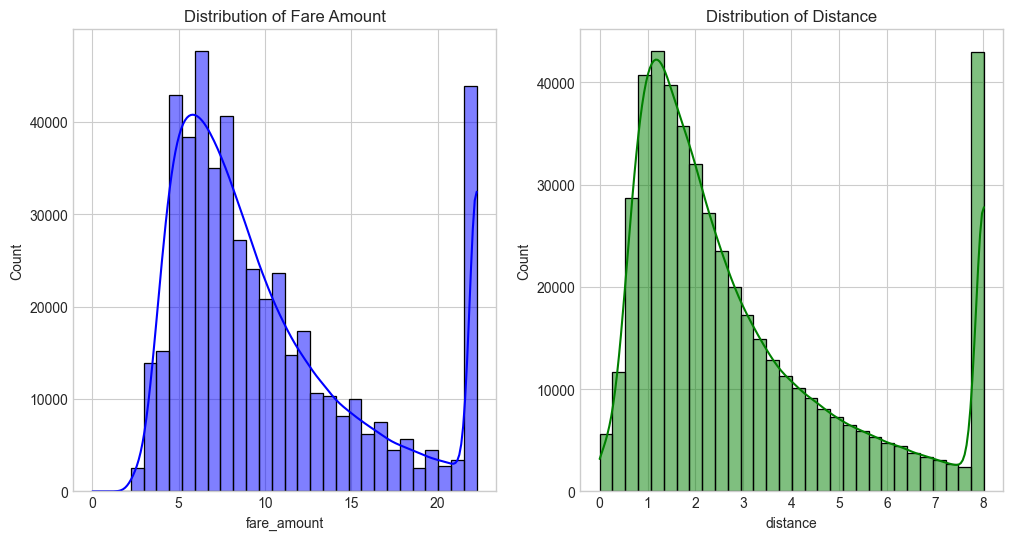

In [32]:
# Histograms for numerical variables
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['fare_amount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Fare Amount')

plt.subplot(1, 2, 2)
sns.histplot(df['distance'], bins=30, kde=True, color='green')
plt.title('Distribution of Distance')

plt.show()

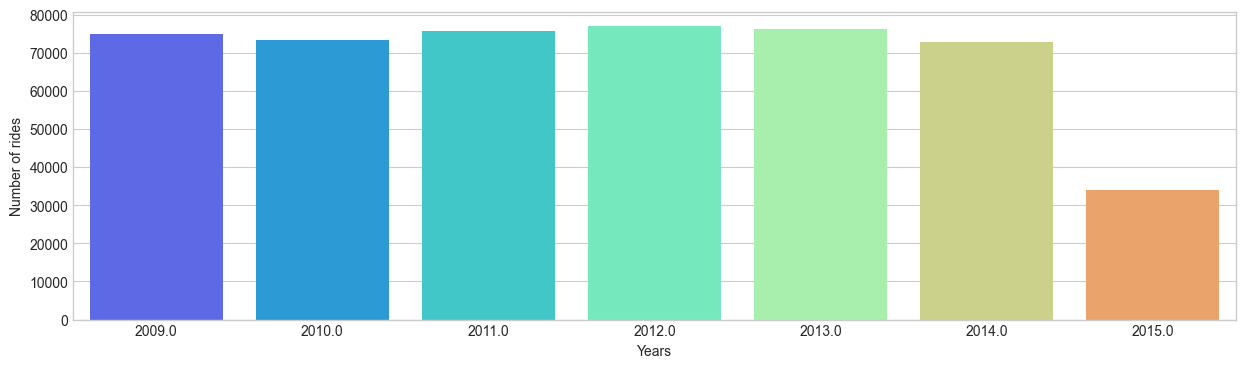

In [33]:
# Barplot for visualizing the number of rides in the following years
year_insight = df.year.value_counts()
palette = sns.color_palette("rainbow", 8)
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x=year_insight.index, y=year_insight.values, palette=palette)
plt.ylabel("Number of rides")
plt.xlabel("Years")
plt.show()

In [34]:
df.columns

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

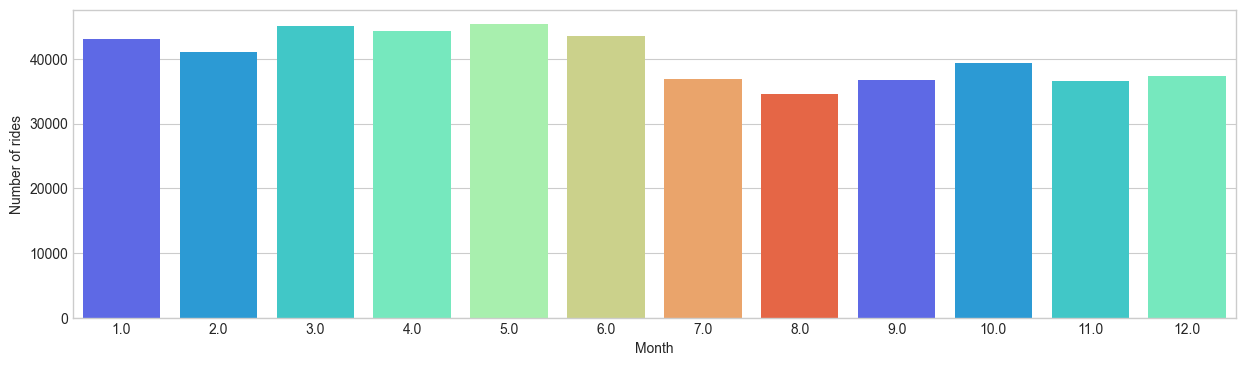

In [35]:
# Datetime features
month_insight = df.month.value_counts()
palette = sns.color_palette("rainbow", 8)
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x=month_insight.index, y=month_insight.values, palette=palette)
plt.ylabel("Number of rides")
plt.xlabel("Month")
plt.show()

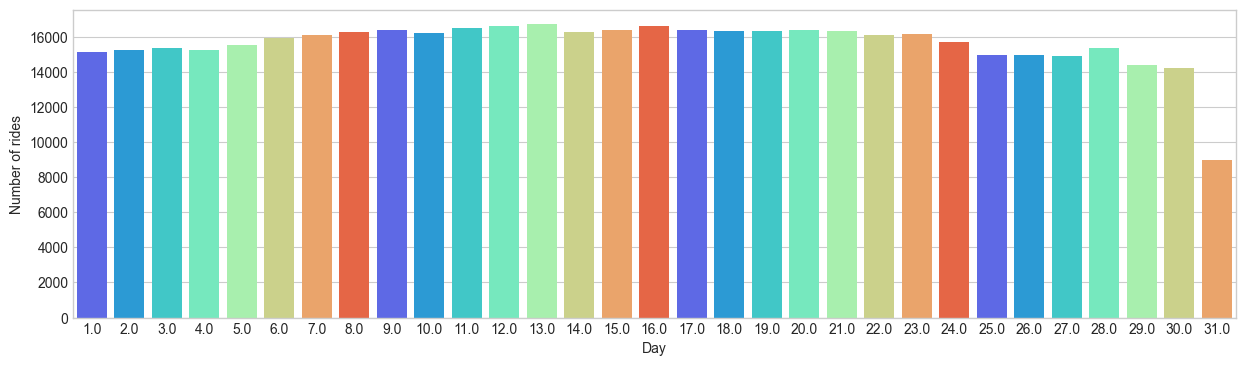

In [36]:
# Day
day = df.day.value_counts()
palette = sns.color_palette("rainbow", 8)
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x=day.index, y=day.values, palette=palette)
plt.ylabel("Number of rides")
plt.xlabel("Day")
plt.show()

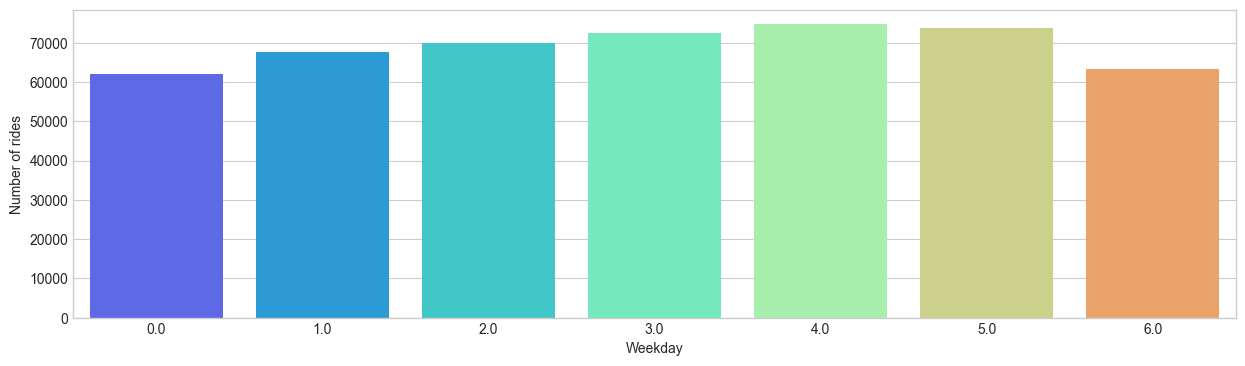

In [37]:
weekday = df.weekday.value_counts()
palette = sns.color_palette("rainbow", 8)
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x=weekday.index, y=weekday.values, palette=palette)
plt.ylabel("Number of rides")
plt.xlabel("Weekday")
plt.show()

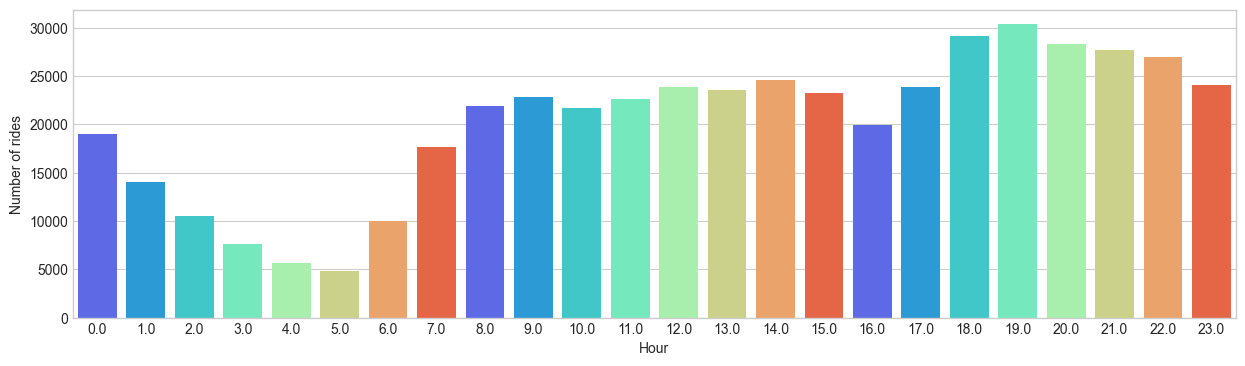

In [38]:
hour = df.hour.value_counts()
palette = sns.color_palette("rainbow", 8)
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x=hour.index, y=hour.values, palette=palette)
plt.ylabel("Number of rides")
plt.xlabel("Hour")
plt.show()

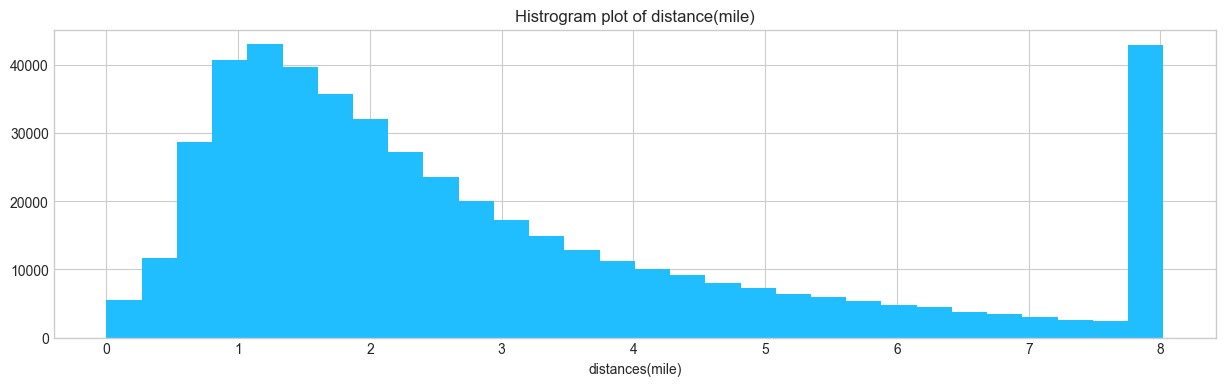

In [39]:
df.distance.hist(bins=30, figsize=(15,4), color='#20beff')
plt.xlabel("distances(mile)")
plt.title("Histrogram plot of distance(mile)")
plt.show()

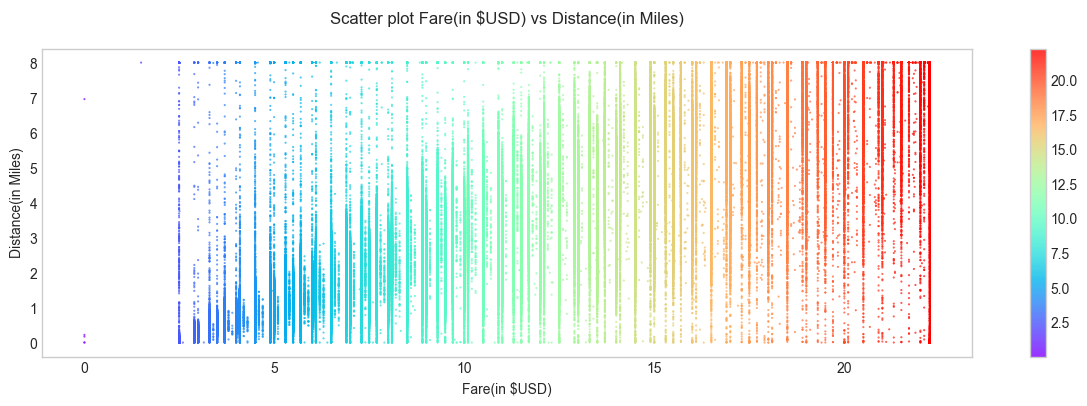

In [40]:
plt.figure(figsize=(15,4))

plt.scatter(df.fare_amount, df.distance, c=df.fare_amount, 
            cmap=plt.cm.rainbow, alpha=0.8, s=1, marker=".")
plt.xlabel("Fare(in $USD)")
plt.ylabel("Distance(in Miles)")
plt.title("Scatter plot Fare(in $USD) vs Distance(in Miles)\n")
ol = plt.grid(False)
plt.colorbar(ol)
plt.show()

C:\Users\Mohamed Essam\AppData\Local\Temp\ipykernel_25808\3516714725.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
C:\Users\Mohamed Essam\AppData\Local\Temp\ipykernel_25808\3516714725.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

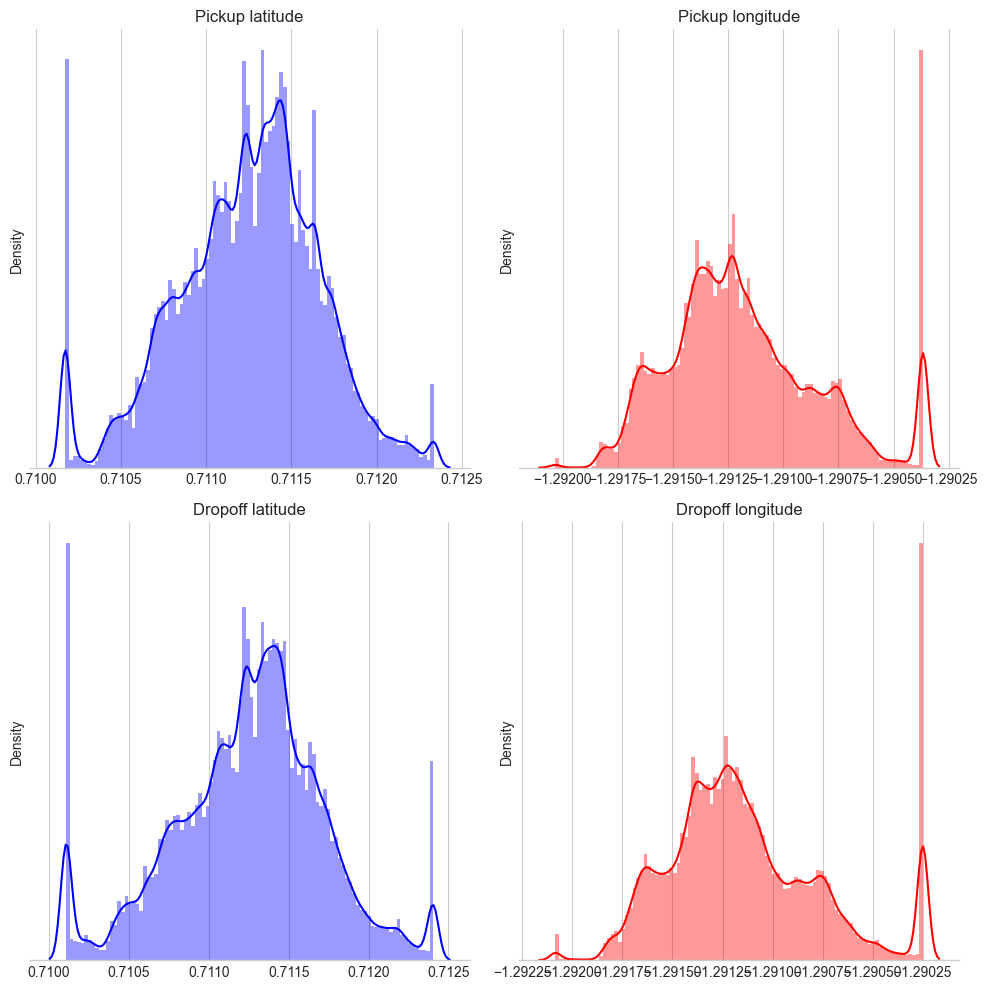

In [41]:
f, axes = plt.subplots(2,2,figsize=(10, 10))
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
axes[0,0].set_title('Pickup latitude')
sns.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
axes[0,1].set_title('Pickup longitude')
sns.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1,0])
axes[1,0].set_title('Dropoff latitude')
sns.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1,1])
axes[1,1].set_title('Dropoff longitude')
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

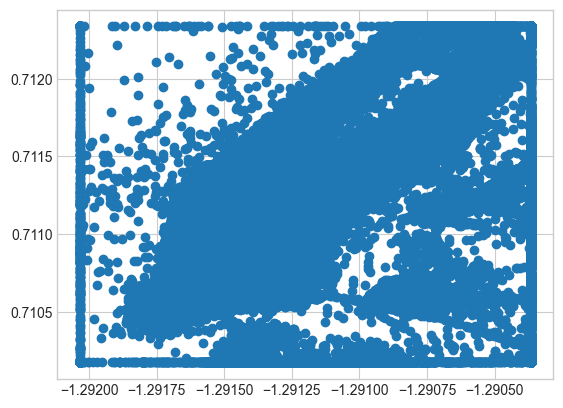

In [42]:
plt.scatter(x=df['pickup_longitude'], y=df['pickup_latitude'])
plt.show()

In [43]:
# import plotly.express as px


# fig = px.scatter_geo(df,lat='pickup_latitude',lon='pickup_longitude', hover_name="fare_amount")
# fig.update_layout(title = 'World map', title_x=0.5)
# fig.show()

In [44]:
df.columns

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

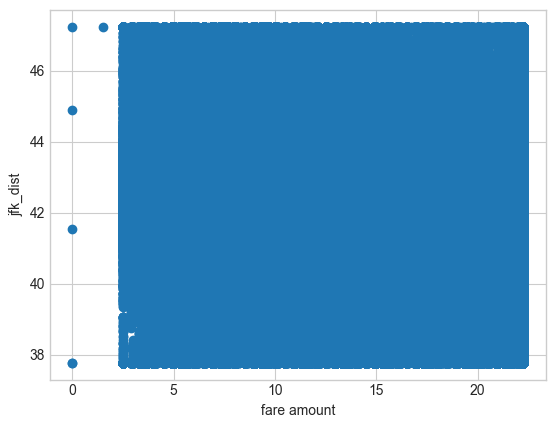

In [45]:
plt.scatter(x=df['fare_amount'], y=df['jfk_dist'])
plt.xlabel('fare amount')
plt.ylabel('jfk_dist')
plt.show()


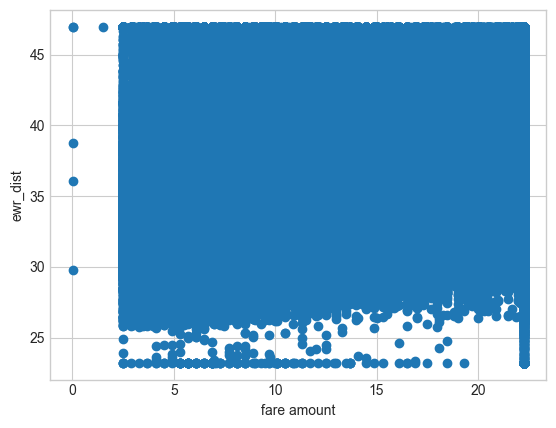

In [46]:
plt.scatter(x=df['fare_amount'], y=df['ewr_dist'])
plt.xlabel('fare amount')
plt.ylabel('ewr_dist')
plt.show()


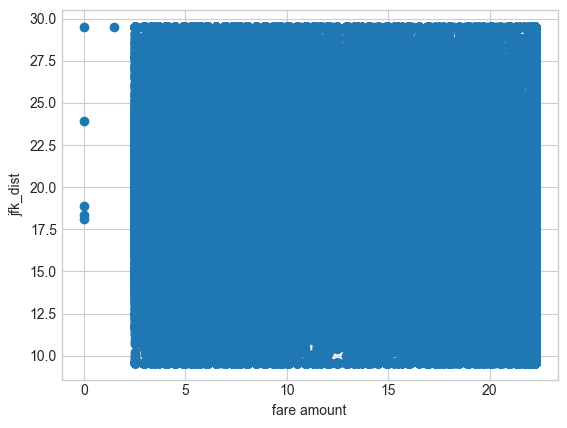

In [47]:
plt.scatter(x=df['fare_amount'], y=df['lga_dist'])
plt.xlabel('fare amount')
plt.ylabel('jfk_dist')
plt.show()


## Label Encoding

In [43]:
# Display unique values for each categorical column
categorical_columns = df.select_dtypes("object").columns

for column in categorical_columns:
    print(column, " : ", df[column].unique(), " \n\n ************************************************\n")

Car Condition  :  ['Very Good' 'Excellent' 'Bad' 'Good']  

 ************************************************

Weather  :  ['windy' 'cloudy' 'stormy' 'sunny' 'rainy']  

 ************************************************

Traffic Condition  :  ['Congested Traffic' 'Flow Traffic' 'Dense Traffic']  

 ************************************************



In [44]:
# Lbel Encoder
from sklearn.preprocessing import LabelEncoder

# Use LabelEncoder to encode categorical columns
encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])


In [45]:
# Display unique values for specific categorical columns
for column in ['Car Condition', 'Weather', 'Traffic Condition']:
    print(column, " : ", df[column].unique(), " \n\n ************************************************\n")

Car Condition  :  [3 1 0 2]  

 ************************************************

Weather  :  [4 0 2 3 1]  

 ************************************************

Traffic Condition  :  [0 2 1]  

 ************************************************



week day  :  [ 0  Monday , 1 Tuesday ,  3 Thursday , 5 Saturday ,  2 Wednesday , 6 Sunday,  4 Friday ]

**********************************************

## Feature selection

<Axes: >

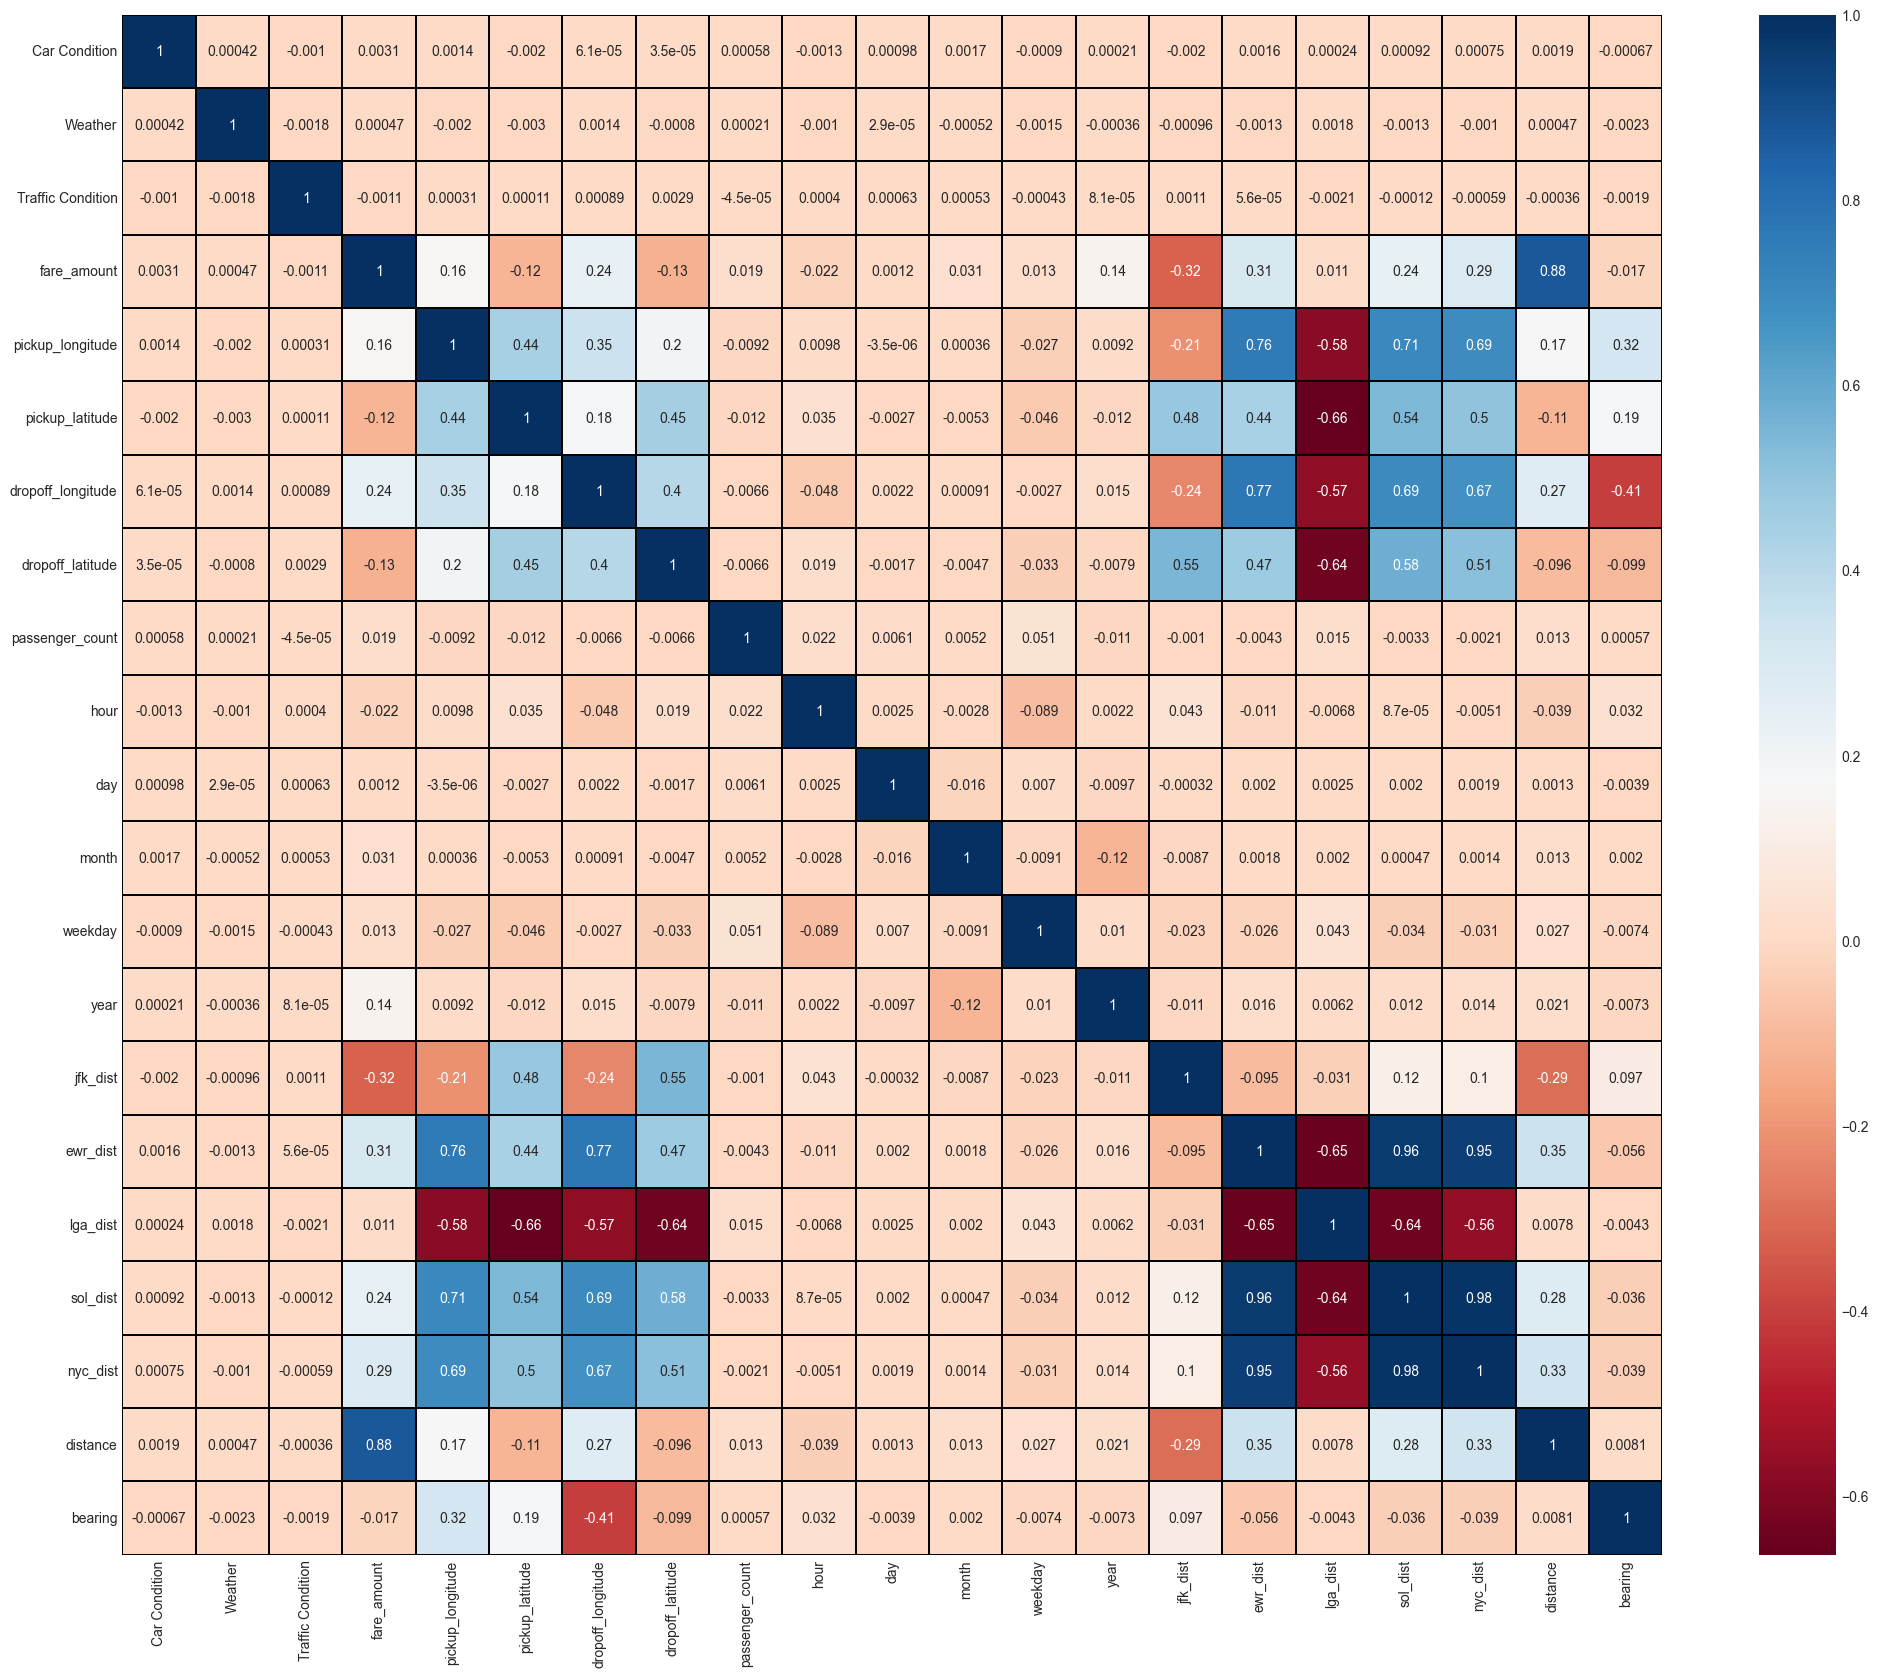

In [46]:
# Selecting Relevant Features
corrMatrix_1 = df.corr()

fig, ax = plt.subplots(figsize=(25,20))
#sns.heatmap(corrMatrix_1, annot=True)
sns.heatmap(corrMatrix_1, annot=True, linewidth=0.01, square=True, cmap="RdBu", linecolor="black")


In [47]:
# Correlation with output variable
cor_target = abs(corrMatrix_1["fare_amount"])

# Selecting highly correlated features : 0.01
relevant_features = cor_target[cor_target>0.01]
print("relevant_features : ",relevant_features.shape,"\n",relevant_features)

print("-----------------------------------------------------------------------")
lst_columns = relevant_features.index.to_list()

df2 = pd.DataFrame(df, columns= lst_columns)
print (df2.head(10))

print("-----------------------------------------------------------------------")
my_cols = df2.columns.to_list()
print("List the column names : ",len(my_cols),"\n",my_cols)


relevant_features :  (17,) 
 fare_amount          1.000000
pickup_longitude     0.158275
pickup_latitude      0.117481
dropoff_longitude    0.235816
dropoff_latitude     0.128682
passenger_count      0.019069
hour                 0.021941
month                0.030630
weekday              0.013057
year                 0.141772
jfk_dist             0.322246
ewr_dist             0.306055
lga_dist             0.011352
sol_dist             0.239222
nyc_dist             0.290966
distance             0.875510
bearing              0.017230
Name: fare_amount, dtype: float64
-----------------------------------------------------------------------
   fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5         -1.290366         0.710721          -1.290250   
1         16.9         -1.291824         0.710546          -1.291182   
2          5.7         -1.291242         0.711418          -1.291391   
3          7.7         -1.291319         0.710927          -1.29139

In [48]:
df2.shape

(483950, 17)

In [49]:
df2.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,4.5,-1.290366,0.710721,-1.290250,0.710563,1.0,17.0,6.0,0.0,2009.0,37.766332,46.972071,14.342611,33.148593,24.836231,1.030764,-2.918897
1,16.9,-1.291824,0.710546,-1.291182,0.711780,1.0,16.0,1.0,1.0,2010.0,44.667679,31.832358,23.130775,15.125872,8.755732,8.021226,-0.375217
2,5.7,-1.291242,0.711418,-1.291391,0.711231,2.0,0.0,8.0,3.0,2011.0,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,7.7,-1.291319,0.710927,-1.291396,0.711363,1.0,4.0,4.0,5.0,2012.0,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,5.3,-1.290987,0.711536,-1.290787,0.711811,1.0,7.0,3.0,1.0,2010.0,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


# Machine Learning

## Split Data

In [50]:
# Define X variables and our target(y)
X = df2[['passenger_count', 'hour', 'month', 'weekday', 'year', 'distance']].copy().astype(float)
y = df2[["fare_amount"]].copy()
print("X : ",X.shape," y : ",y.shape)


# # Standardization
from sklearn.preprocessing import StandardScaler
# st_scaler = StandardScaler()
# st_scaler.fit(X)
# X_st_scaler = st_scaler.transform(X)


# Split into Input and Output Elements
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
              y, test_size= 0.30, random_state=42)

print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test = ", y_test.shape)


X :  (483950, 6)  y :  (483950, 1)
X_train =  (338765, 6)  y_train =  (338765, 1)
X_test  =  (145185, 6)  y_test =  (145185, 1)


# Algorithms

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor

import time
from sklearn import metrics

## 1. Linear Regration Model

In [124]:
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
# Evaluate the model
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [125]:
print(f"The MSE for train = {mse_train}")
print(f"The MSE for test = {mse_test}")
print("-" * 50)
print(f"The RMSE for train = {rmse_train}")
print(f"The RMSE for train = {rmse_train}")

The MSE for train = 6.445320401447694
The MSE for test = 6.399554040180875
--------------------------------------------------
The RMSE for train = 2.538763557609825
The RMSE for train = 2.538763557609825


In [126]:
from sklearn.metrics import r2_score

y_test_pred = lin_reg.predict(X_test)
score = r2_score(y_test, y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 78.0%


In [127]:
# Interpret the coefficients
coefficients = lin_reg.coef_
intercept = lin_reg.intercept_

print(f"The coefficients of the mdoel = {coefficients} and intercept = {intercept}")

The coefficients of the mdoel = [[ 0.05444059  0.00904653  0.05314609 -0.03011959  0.37159736  2.12463067]] and intercept = [-744.18388049]


In [128]:
def plot_linear_regression_mse(X_train, X_test, y_train, y_test,model=lin_reg, num_iterations=10000):

    # Training loop with MSE visualization
    mse_train_values = []
    mse_test_values = []

    for i in range(1, num_iterations + 1):
        model.fit(X_train[:i], y_train[:i])  # Train on an increasing subset of the data
        y_train_pred = model.predict(X_train[:i])
        y_test_pred = model.predict(X_test)
        
        # Calculate MSE for training set
        mse_train = mean_squared_error(y_train[:i], y_train_pred)
        mse_train_values.append(mse_train)
        
        # Calculate MSE for testing set
        mse_test = mean_squared_error(y_test, y_test_pred)
        mse_test_values.append(mse_test)

    # Plot the MSE values for both training and testing sets
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_iterations + 1), mse_train_values, label='MSE (Train)')
    plt.plot(range(1, num_iterations + 1), mse_test_values, label='MSE (Test)')
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.title('Linear Regression Training Loop')
    plt.legend()
    plt.show()

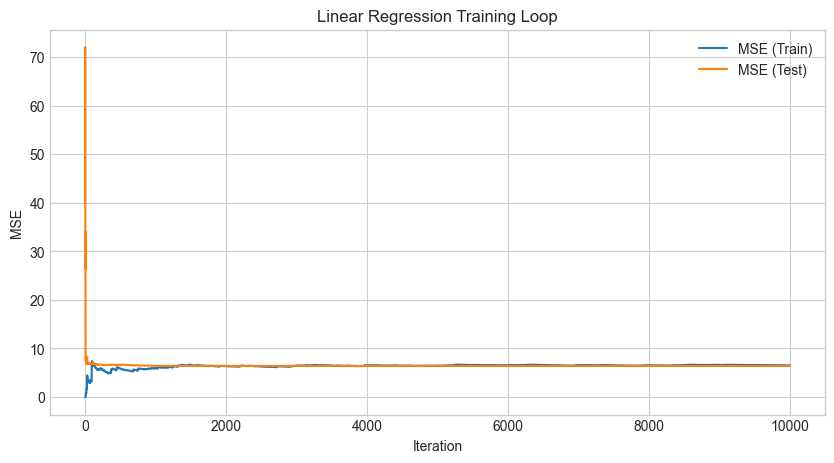

In [129]:
plot_linear_regression_mse(X_train, X_test, y_train, y_test)

In [130]:
def plot_linear_regression_rmse(X_train, X_test, y_train, y_test,model=lin_reg, num_iterations=10000):

    # Training loop with MSE visualization
    rmse_train_values = []
    rmse_test_values = []

    for i in range(1, num_iterations + 1):
        model.fit(X_train[:i], y_train[:i])  # Train on an increasing subset of the data
        y_train_pred = model.predict(X_train[:i])
        y_test_pred = model.predict(X_test)
        
        # Calculate MSE for training set
        rmse_train = np.sqrt(mean_squared_error(y_train[:i], y_train_pred))
        rmse_train_values.append(rmse_train)
        
        # Calculate MSE for testing set
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        rmse_test_values.append(rmse_test)

    # Plot the MSE values for both training and testing sets
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_iterations + 1), rmse_train_values, label='RMSE (Train)')
    plt.plot(range(1, num_iterations + 1), rmse_test_values, label='RMSE (Test)')
    plt.xlabel('Iteration')
    plt.ylabel('RMSE')
    plt.title('Linear Regression Training Loop')
    plt.legend()
    plt.show()

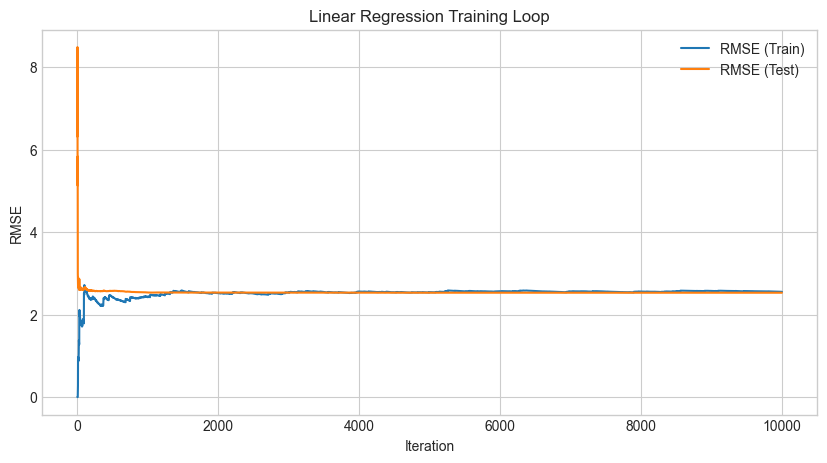

In [131]:
plot_linear_regression_rmse(X_train, X_test, y_train, y_test)

## 2. Ridge Regression


In [72]:
from sklearn.linear_model import Ridge

# Initialize the Ridge regression model
ridge_model = Ridge(alpha=0.5)  # You can adjust the alpha value as per your needs

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


print(f"The MSE for train = {mse_train}")
print(f"The MSE for test = {mse_test}")
print("-" * 50)
print(f"The RMSE for train = {rmse_train}")
print(f"The RMSE for train = {rmse_train}")



# y_test_pred = lin_reg.predict(X_test)
score = r2_score(y_test, y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))



The MSE for train = 6.452018658406308
The MSE for test = 6.40317793501084
--------------------------------------------------
The RMSE for train = 2.54008241173516
The RMSE for train = 2.54008241173516
The accuracy of our model is 78.0%


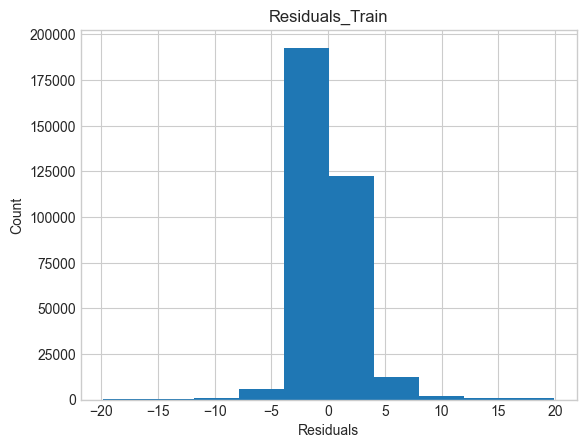

In [81]:
residuals_train = y_train - y_train_pred

# Plot the histogram
plt.hist(residuals_train, bins=10)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residuals_Train')
plt.show()

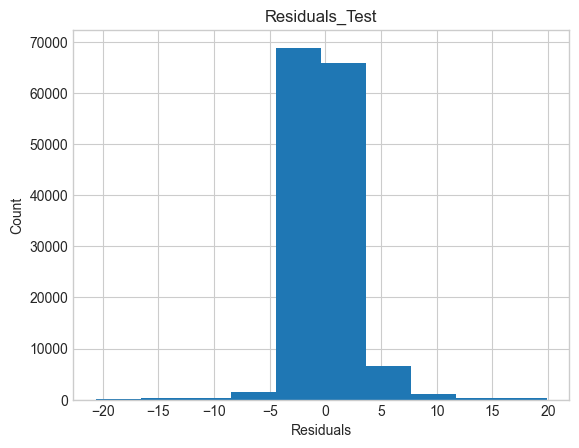

In [83]:
residuals_test = y_test - y_test_pred

# Plot the histogram
plt.hist(residuals_test, bins=10)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residuals_Test')
plt.show()

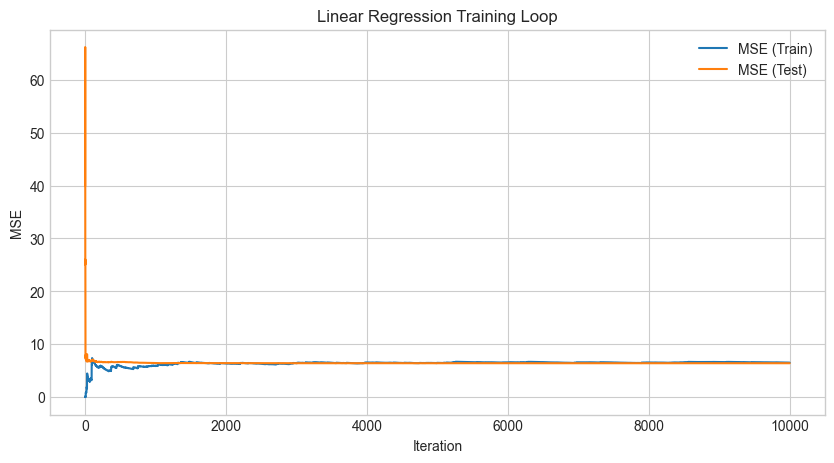

In [74]:
plot_linear_regression_mse(X_train, X_test, y_train, y_test, model=ridge_model)

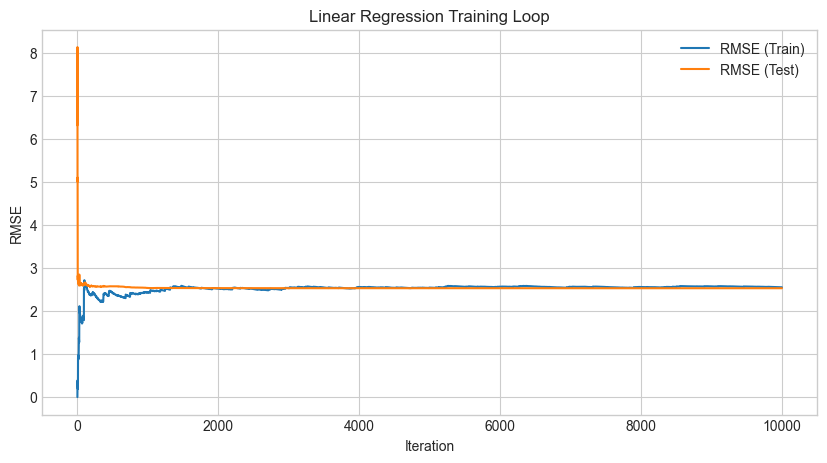

In [75]:
plot_linear_regression_rmse(X_train, X_test, y_train, y_test, model=ridge_model)

## 3. Polynomial Regression max degree 3

In [89]:
from sklearn.preprocessing import PolynomialFeatures


# Define the maximum degree of the polynomial features
max_degree = 3

# Create polynomial features for training and test data
poly_features = PolynomialFeatures(degree=max_degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


print(f"The MSE for train = {mse_train}")
print(f"The MSE for test = {mse_test}")
print("-" * 50)
print(f"The RMSE for train = {rmse_train}")
print(f"The RMSE for train = {rmse_train}")



# y_test_pred = lin_reg.predict(X_test)
score = r2_score(y_test, y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 4) *100))

The MSE for train = 6.052358718865918
The MSE for test = 6.004700225454249
--------------------------------------------------
The RMSE for train = 2.4601542063183595
The RMSE for train = 2.4601542063183595
The accuracy of our model is 79.81%


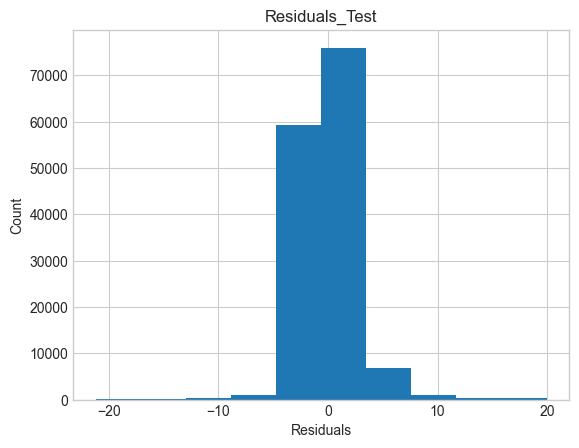

In [91]:
residuals_test = y_test - y_test_pred

# Plot the histogram
plt.hist(residuals_test, bins=10)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residuals_Test')
plt.show()

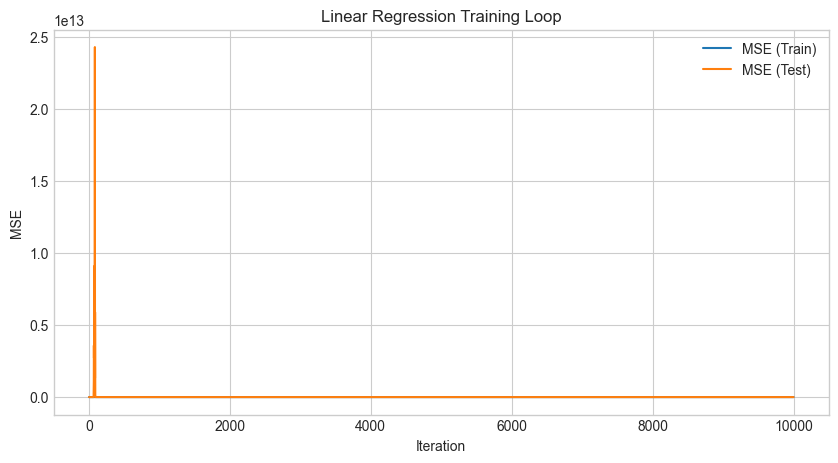

In [90]:
plot_linear_regression_mse(X_train_poly, X_test_poly, y_train, y_test, model=model)

## 4. Decision Tree Regression

In [93]:
from sklearn.tree import DecisionTreeRegressor
des_reg = DecisionTreeRegressor()

des_reg.fit(X_train, y_train)

y_train_pred = des_reg.predict(X_train)
y_test_pred = des_reg.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


print(f"The MSE for train = {mse_train}")
print(f"The MSE for test = {mse_test}")
print("-" * 50)
print(f"The RMSE for train = {rmse_train}")
print(f"The RMSE for train = {rmse_test}")



# y_test_pred = lin_reg.predict(X_test)
score = r2_score(y_test, y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The MSE for train = 0.2768641963437921
The MSE for test = 11.628657370435826
--------------------------------------------------
The RMSE for train = 0.526178863452146
The RMSE for train = 0.526178863452146
The accuracy of our model is 61.0%


## 5. Random Forest Regression

In [98]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


print(f"The MSE for train = {mse_train}")
print(f"The MSE for test = {mse_test}")
print("-" * 50)
print(f"The RMSE for train = {rmse_train}")
print(f"The RMSE for train = {rmse_train}")



score = r2_score(y_test, y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

c:\Users\Mohamed Essam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The MSE for train = 1.063846336689228
The MSE for test = 6.131924707564143
--------------------------------------------------
The RMSE for train = 1.031429268873648
The RMSE for train = 1.031429268873648
The accuracy of our model is 79.0%


## 6. XGBoost Regressor


In [52]:
! pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.0/99.8 MB 326.8 kB/s eta 0:05:06
   ---------------------------------------- 0.1/99.8 MB 393.8 kB/s eta 0:04:14
   ---------------------------------------- 0.1/99.8 MB 438.1 kB/s eta 0:03:48
   ---------------------------------------- 0.1/99.8 MB 437.6 kB/s eta 0:03:48
   ---------------------------------------- 0.1/99.8 MB 423.5 kB/s eta 0:03:56
   ---------------------------------------- 0.2/99.8 MB 437.1 kB/s eta 0:03:48
   ---------------------------------------- 0.2/99.8 MB 456.4 kB/s eta 0:03:39
   ---------------------------------------- 0.2/99.8 MB 461.0 kB/s eta 0:03:36
   ---------------------------------------- 0.2/99.8 MB 474.7 kB/s eta 0:03:30
   ---------------------------------------- 0.2/99.8 MB 480.3 kB/s eta

In [54]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
# XGBoost Regression Model
xgb = XGBRegressor(n_estimators=100, max_depth=5)
xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


print(f"The MSE for train = {mse_train}")
print(f"The MSE for test = {mse_test}")
print("-" * 50)
print(f"The RMSE for train = {rmse_train}")
print(f"The RMSE for train = {rmse_test}")



score = r2_score(y_test, y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The MSE for train = 5.329971559450422
The MSE for test = 5.430586962790949
--------------------------------------------------
The RMSE for train = 2.3086731166300747
The RMSE for train = 2.330361981064519
The accuracy of our model is 82.0%


[0]	validation_0-rmse:4.20168	validation_1-rmse:4.20797
[1]	validation_0-rmse:3.42820	validation_1-rmse:3.43000
[2]	validation_0-rmse:2.96910	validation_1-rmse:2.96654
[3]	validation_0-rmse:2.70945	validation_1-rmse:2.70322
[4]	validation_0-rmse:2.56693	validation_1-rmse:2.55818


c:\Users\Mohamed Essam\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:2.48976	validation_1-rmse:2.47857
[6]	validation_0-rmse:2.44396	validation_1-rmse:2.43160
[7]	validation_0-rmse:2.41807	validation_1-rmse:2.40547
[8]	validation_0-rmse:2.40249	validation_1-rmse:2.38952
[9]	validation_0-rmse:2.39266	validation_1-rmse:2.37944
[10]	validation_0-rmse:2.38357	validation_1-rmse:2.37032
[11]	validation_0-rmse:2.37675	validation_1-rmse:2.36375
[12]	validation_0-rmse:2.37144	validation_1-rmse:2.35869
[13]	validation_0-rmse:2.36891	validation_1-rmse:2.35651
[14]	validation_0-rmse:2.36573	validation_1-rmse:2.35394
[15]	validation_0-rmse:2.36231	validation_1-rmse:2.35083
[16]	validation_0-rmse:2.36015	validation_1-rmse:2.34951
[17]	validation_0-rmse:2.35861	validation_1-rmse:2.34852
[18]	validation_0-rmse:2.35732	validation_1-rmse:2.34722
[19]	validation_0-rmse:2.35538	validation_1-rmse:2.34632
[20]	validation_0-rmse:2.35409	validation_1-rmse:2.34544
[21]	validation_0-rmse:2.35322	validation_1-rmse:2.34521
[22]	validation_0-rmse:2.35145	valid

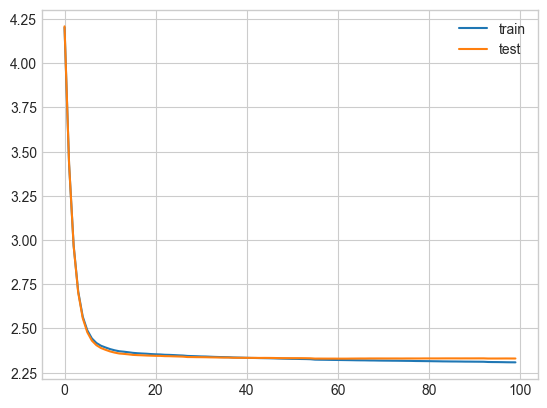

In [55]:
from sklearn.metrics import accuracy_score
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
xgb.fit(X_train, y_train, eval_metric='rmse', eval_set=evalset)

# retrieve performance metrics
results = xgb.evals_result()
# plot learning curves
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

## Save Model using pkl


In [111]:
import pickle

# Save the model to a pickle file
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)


In [59]:
from joblib import dump
dump(xgb, '../savedModels/model.joblib')

['../savedModels/model.joblib']